In [54]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
os.listdir('Landsat8/')
#import bands as separate 1 band raster
band4 = rasterio.open('Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif') #red
band5 = rasterio.open('Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif') #nir

1338
2107


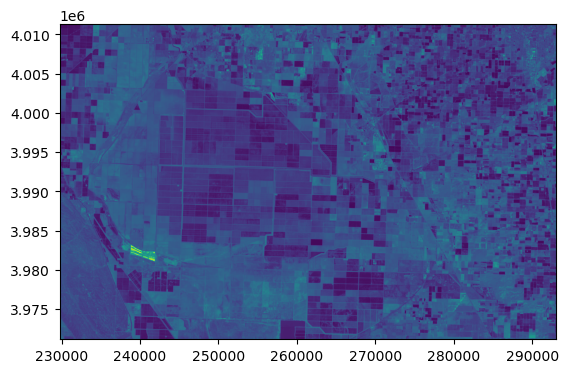

<AxesSubplot:>

In [55]:
#number of raster rows
print(band4.height)
#number of raster columns
print(band4.width)
#plot band 
plot.show(band4)

1338
2107


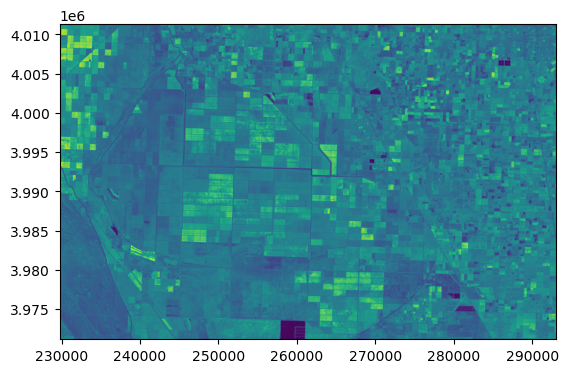

<AxesSubplot:>

In [56]:
#number of raster rows
print(band5.height)
#number of raster columns
print(band5.width)
#plot band 
plot.show(band5)

In [57]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [58]:
#raster sytem of reference
band4.crs

CRS.from_epsg(32611)

In [59]:
#raster transform parameters
band4.transform

Affine(30.0, 0.0, 229755.0,
       0.0, -30.0, 4011285.0)

In [60]:
#raster values as matrix array
band4.read(1)

array([[ 7479,  7474,  7472, ...,  8970,  9186,  9849],
       [ 7482,  7488,  7477, ...,  9048,  9151,  9667],
       [ 7497,  7468,  7454, ...,  9115,  9150, 10156],
       ...,
       [17295, 16415, 16222, ..., 11569, 11376, 11254],
       [17162, 16303, 15322, ..., 11617, 11278, 11115],
       [16905, 16026, 15720, ..., 12508, 12893, 13168]], dtype=uint16)

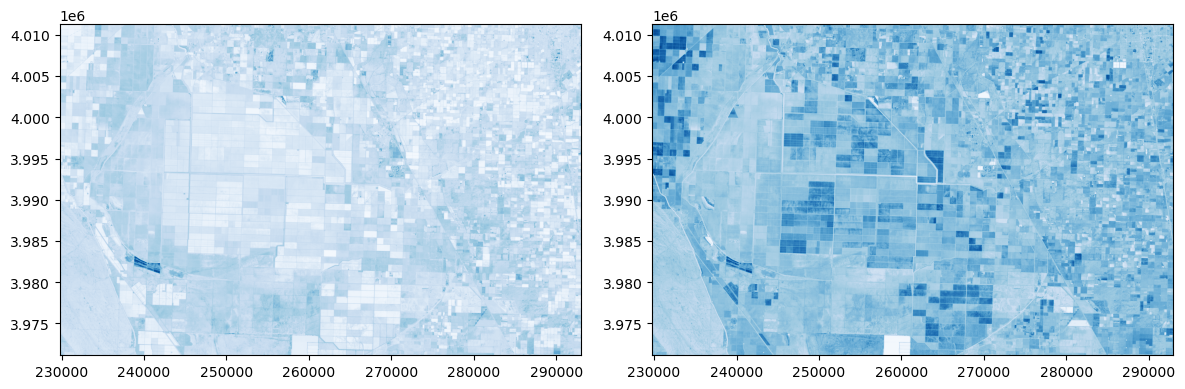

In [61]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [62]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir

array([[24079., 24061., 24131., ...,  9747., 10231., 11190.],
       [24169., 24213., 24173., ...,  9900., 10084., 10855.],
       [24253., 24438., 24265., ...,  9910., 10079., 11592.],
       ...,
       [21594., 20611., 20397., ..., 20179., 20035., 19973.],
       [21441., 20507., 19362., ..., 20189., 19976., 19941.],
       [21080., 20536., 20172., ..., 20531., 20744., 20915.]])

In [63]:
#ndvi calculation, empty cells or nodata cells are reported as 0
#NDVI = (NIR-Red) / (NIR+Red),
ndvi=np.where((nir+red)==0., 0, (nir-red)/(nir+red))
ndvi[:5,:5]

array([[0.52601559, 0.525987  , 0.5271335 , 0.52442396, 0.52136479],
       [0.52721873, 0.52758588, 0.52751975, 0.5246888 , 0.52311125],
       [0.52774803, 0.53187488, 0.52999779, 0.52700989, 0.52593861],
       [0.53090761, 0.52997044, 0.52947468, 0.52603985, 0.52432536],
       [0.5317881 , 0.52931154, 0.53190956, 0.52842704, 0.52400689]])

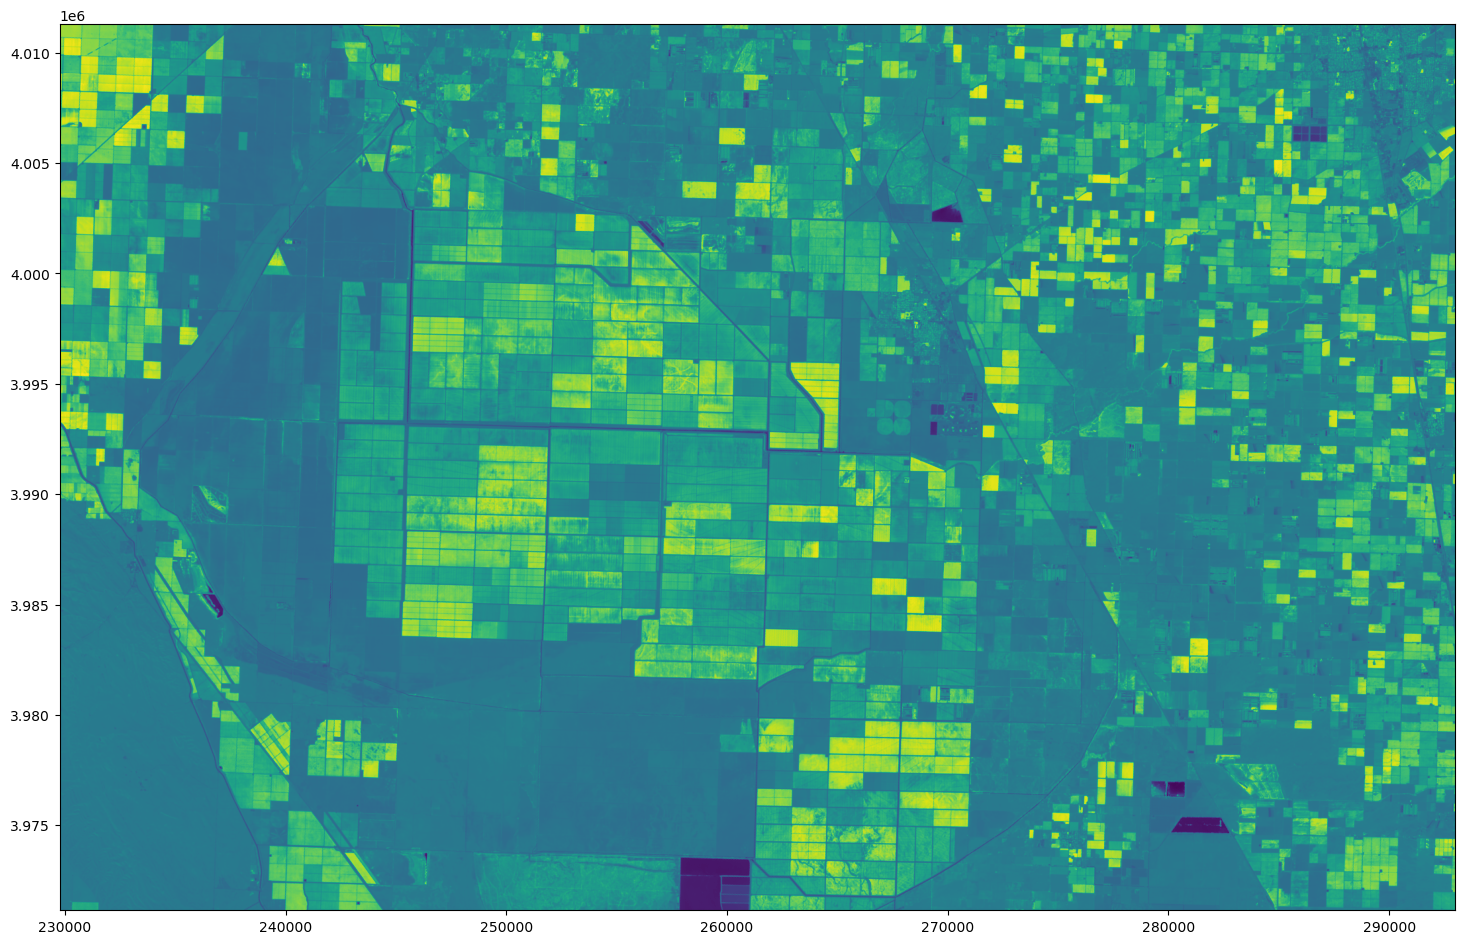

<AxesSubplot:>

In [64]:
#export ndvi image
ndviImage = rasterio.open('Output/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()
#plot ndvi
ndvi = rasterio.open('Output/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)